Prepare a prediction model for profit of 50_startups data.

Do transformations for getting better predictions of profit and
 make a table containing
 R^2 value for each prepared model.


R&D Spend -- Research and devolop spend in the past few years

Administration -- spend on administration in the past few years

Marketing Spend -- spend on Marketing in the past few years

State -- states from which data is collected

Profit  -- profit of each state in the past few years


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [2]:
data = pd.read_csv("F:\\Excelr\\Assignment\\Using R\\MLR\\50_Startups.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
for col in data.columns:
    print(col)

R&D Spend
Administration
Marketing Spend
State
Profit


In [7]:
data.replace(to_replace={"New York":"1",
                        "California":"2",
                        "Florida":"3"},inplace = True)

In [8]:
data.rename(columns={'R&D Spend':'rd',
                    "Administration":"adm",
                    "Marketing Spend":'ms',
                    'State':'st',
                    'Profit':'pr'},inplace=True)

In [9]:
for col in data.columns:
    print(col)

rd
adm
ms
st
pr


In [10]:
y = data.pr

In [11]:
x = data[['rd','adm','ms','st']]

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

In [13]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(35, 4) (35,)
(15, 4) (15,)


In [14]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [15]:
y_pred = model.predict(x_test)
print(y_pred)

[128390.19407936  86163.41785891 157464.86476972  43362.96375143
  95327.96209868  95107.87672602 126214.62236829  55404.66521884
  46214.74578104 159175.36971663  71786.07968235 109575.04005637
  95446.46674848 129045.87514456 176355.47535983]


In [16]:
model.coef_

array([ 8.56728932e-01, -1.32757556e-01,  1.60218672e-02, -4.67658782e+02])

In [17]:
rr = Ridge(alpha=0.01)
rr.fit(x_train,y_train)

Ridge(alpha=0.01)

In [18]:
rr_pred=rr.predict(x_test)
print(rr_pred)

[128390.42517654  86163.41869167 157464.90112821  43362.97207213
  95327.79514768  95108.11681741 126214.65227676  55404.45822128
  46214.55121908 159175.43807616  71786.28119448 109575.24737719
  95446.46269284 129046.09793344 176355.71338805]


In [19]:
rr.coef_

array([ 8.56729467e-01, -1.32757385e-01,  1.60217579e-02, -4.67457503e+02])

In [20]:
rr100 = Ridge(alpha=100)
rr100.fit(x_train,y_train)


rr100_pred=rr100.predict(x_test)
print(rr100_pred)

[128825.93534259  86164.98805162 157533.41979387  43378.6527752
  95013.17054077  95560.57693632 126271.0157631   55014.3644807
  45847.89289497 159304.26367638  72166.03750929 109965.95027661
  95438.81964264 129465.95086565 176804.28521092]


In [21]:
rr100.coef_

array([ 8.57737159e-01, -1.32434696e-01,  1.58157965e-02, -8.81406411e+01])

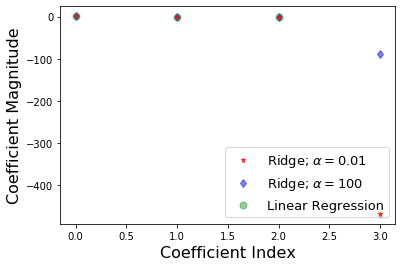

In [22]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 
plt.plot(model.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [23]:
from sklearn.linear_model import Lasso

In [24]:
lasso = Lasso()
lasso.fit(x_train,y_train)

Lasso()

In [25]:
lasso.coef_

array([ 8.56732936e-01, -1.32756272e-01,  1.60210489e-02, -4.66151740e+02])

In [26]:
train_score = lasso.score(x_train,y_train)
test_score = lasso.score(x_test,y_test)


In [27]:
coeff_used = np.sum(lasso.coef_!=0)

In [28]:
print(train_score)
print(test_score)
print(coeff_used)

0.952819017117698
0.9255286694924092
4


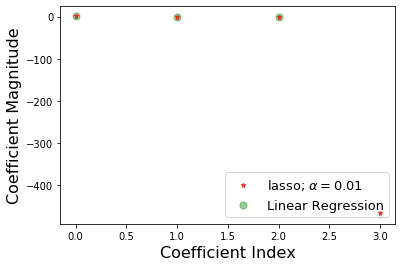

In [29]:
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'lasso; $\alpha = 0.01$',zorder=7) 
plt.plot(model.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()